# Conf int for proportions

In [0]:
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Most mammals are unable to digest lactose, which is capable of in milk, in adulthood. In humans, the lactase enzyme encoded by the LCT gene is responsible for the breakdown of lactose. This function continues to function throughout life. The distribution of this gene variant varies significantly among different genetic populations.


Of the 50 Mayans studied, 13910T was detected in one. Build a normal 95% confidence interval for the proportion of carriers of variant 13910T in the Mayan population. What is the value of its lower boundary? Round the answer to 4 digits after the decimal point

In [0]:
size = 50
data_gen = np.zeros(size)
data_gen[0] = 1

In [0]:
from statsmodels.stats.proportion import proportion_confint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
normal_interval = proportion_confint(sum(data_gen), len(data_gen), method = 'normal')
print('Normal interval [%.4f, %.4f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

Normal interval [0.0000, 0.0588] with width 0.058805


Under the previous task, build a 95% Wilson confidence interval for the proportion of carriers of variant 13910T in the Mayan population. What is its lower boundary equal to? Round the answer to 4 digits after the decimal point.

In [0]:
wilson_interval = proportion_confint(sum(data_gen), len(data_gen), method = 'wilson')
print('Wilson interval [%.4f, %.4f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1], 
                                                  wilson_interval[1] - wilson_interval[0]))

Wilson interval [0.0035, 0.1050] with width 0.101415


Let the Mayan population have 2% of the carriers of the 13910T variant, as in the sample that we investigated. What sample size is needed to use the normal interval to estimate the proportion of carriers of the 13910T gene with an accuracy of ± 0.01 at a confidence level of 95%?

In [0]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [0]:
n_samples = int(np.ceil(samplesize_confint_proportion(data_gen.mean(), 0.01)))
n_samples

753


Plot a graph of the dependence of the sample size necessary for estimation for the proportion of carriers of the 13910T gene with an accuracy of ± 0.01 at a confidence level of 95% on the unknown parameter p. Look at which p-value you need the most subjects. Do you think it is likely that the sample we are analyzing is taken from a random variable with this parameter value?

No matter how you answer the last question, it is still useful to consider the sample size necessary for such p - this gives the most pessimistic estimate of the required sample size.

What is the worst-case sample size needed to use the normal interval to estimate the proportion of carriers of the 13910T gene with an accuracy of ± 0.01 at a confidence level of 95%?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
proportion = np.linspace(0, 1, 101)
proportion

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [0]:
n_samples = np.empty(proportion.shape)
for i, p in enumerate(proportion):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))
n_samples

array([   0.,  381.,  753., 1118., 1476., 1825., 2167., 2501., 2828.,
       3147., 3458., 3761., 4057., 4345., 4626., 4898., 5163., 5421.,
       5670., 5913., 6147., 6373., 6592., 6804., 7007., 7203., 7391.,
       7572., 7745., 7910., 8068., 8217., 8360., 8494., 8621., 8740.,
       8851., 8955., 9051., 9139., 9220., 9293., 9358., 9416., 9466.,
       9508., 9543., 9570., 9589., 9600., 9604., 9600., 9589., 9570.,
       9543., 9508., 9466., 9416., 9358., 9293., 9220., 9139., 9051.,
       8955., 8851., 8740., 8621., 8494., 8360., 8217., 8068., 7910.,
       7745., 7572., 7391., 7203., 7007., 6804., 6592., 6373., 6147.,
       5913., 5670., 5421., 5163., 4898., 4626., 4345., 4057., 3761.,
       3458., 3147., 2828., 2501., 2167., 1825., 1476., 1118.,  753.,
        381.,    0.])

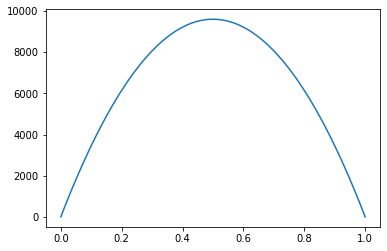

In [0]:
plt.plot(proportion, n_samples);

In [0]:
n_samples[np.where(proportion == 0.5)]

array([9604.])